# Breast Cancer Classifier

Importing necessary libraries.

In [32]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import log_loss
from sklearn.metrics import accuracy_score

In [33]:
filename = os.path.join(os.getcwd(), "breast-cancer.csv")

In [57]:
# read in the dataset
df = pd.read_csv(filename, header=0)

## Data Exploration

In [35]:
df.head(10)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
5,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,...,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440
6,844359,M,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,...,22.88,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368
7,84458202,M,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,...,17.06,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510
8,844981,M,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,...,15.49,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720
9,84501001,M,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,...,15.09,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750


In [36]:
df.shape

(569, 32)

## Data Preparation

This is a binary classification problem in which we will predict whether a tumor is malignant or benign. The label is `diagnosis`. All other columns except for `id` will become features for right now.

In [55]:
df_features = df.drop(columns = ['diagnosis', 'id'], axis=1)
df_features

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


### Handling Missing Data

In [56]:
nan_count = np.sum(df.isnull(), axis = 0)
nan_count

,0
id,0
diagnosis,0
radius_mean,0
texture_mean,0
perimeter_mean,0
area_mean,0
smoothness_mean,0
compactness_mean,0
concavity_mean,0
concave points_mean,0


Since there are no missing values in the dataset we can proceed to inspect the data types of the features.

In [58]:
df.dtypes

,0
id,int64
diagnosis,object
radius_mean,float64
texture_mean,float64
perimeter_mean,float64
area_mean,float64
smoothness_mean,float64
compactness_mean,float64
concavity_mean,float64
concave points_mean,float64


### Creating Labeled Examples

In [40]:
feature_list = list(df.select_dtypes(include=['float64']).columns)

In [41]:
X = df[feature_list]
y = df['diagnosis']

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1234)

In [43]:
X_train.shape
X_test.shape

(188, 30)

### Defining a Logistic Regression Function

In [44]:
def train_test_LR(X_train, y_train, X_test, y_test, c=1):

    model = LogisticRegression(C=c, max_iter=100000000000)
    model.fit(X_train, y_train)
    probability_predictions = model.predict_proba(X_test)
    l_loss = log_loss(y_test, probability_predictions)
    class_label_predictions = model.predict(X_test)
    acc_score = accuracy_score(y_test, class_label_predictions)

    return [l_loss, acc_score]

## Fitting and Evaluating the Model

In [45]:
train_test_LR(X_train, y_train, X_test, y_test, c=1)

[0.15285083844285094, 0.9361702127659575]

The initial results are really good but the accuracy can be a little higher with some slight changes.

In [59]:
# testing different values for hyperparameter c
cs = [10**i for i in range(-5,5)]
cs

[1e-05, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000]

In [60]:
for C in cs:
    result = train_test_LR(X_train, y_train, X_test, y_test, c=C)
    print('c value:' + str(C) + ', accuracy score: ' + str(result[1]))

c value:1e-05, accuracy score: 0.9308510638297872
c value:0.0001, accuracy score: 0.9148936170212766
c value:0.001, accuracy score: 0.9414893617021277
c value:0.01, accuracy score: 0.9308510638297872
c value:0.1, accuracy score: 0.925531914893617
c value:1, accuracy score: 0.9361702127659575
c value:10, accuracy score: 0.9308510638297872
c value:100, accuracy score: 0.9361702127659575
c value:1000, accuracy score: 0.9414893617021277
c value:10000, accuracy score: 0.9521276595744681


In [61]:
cs_log10 = np.log10(cs)

Text(0.5, 1.0, 'Log Loss vs Hyperparameter C')

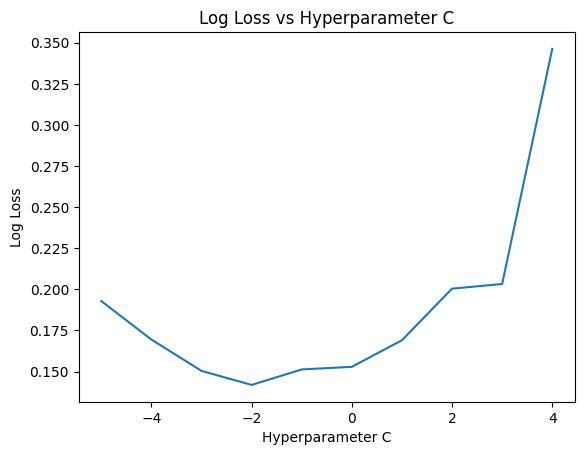

In [64]:
result_list = []
for C in cs:
    result_list.append(train_test_LR(X_train, y_train, X_test, y_test, c=C)[0])
sns.lineplot(x=cs_log10, y=result_list)
plt.xlabel('Hyperparameter C')
plt.ylabel('Log Loss')
plt.title('Log Loss vs Hyperparameter C')

Text(0.5, 1.0, 'Accuracy Score vs Hyperparameter C')

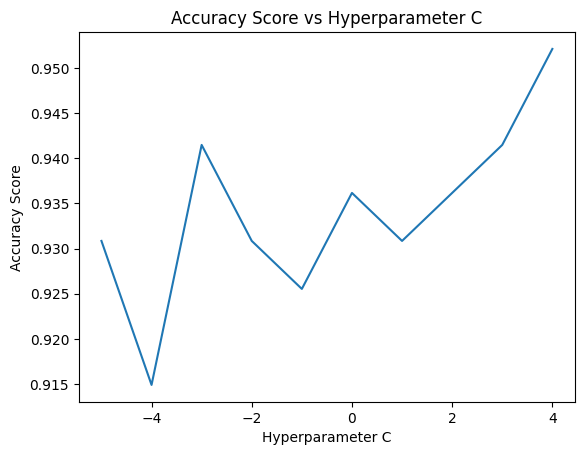

In [65]:
result_list = []
for C in cs:
    result_list.append(train_test_LR(X_train, y_train, X_test, y_test, c=C)[1])
sns.lineplot(x=cs_log10, y=result_list)
plt.xlabel('Hyperparameter C')
plt.ylabel('Accuracy Score')
plt.title('Accuracy Score vs Hyperparameter C')

In [66]:
# fitting and evaluating the final model
model = LogisticRegression(C=0.001, max_iter=1000000)
model.fit(X_train, y_train)
class_label_predictions = model.predict(X_test)
probability_predictions = model.predict_proba(X_test)
acc_score = accuracy_score(y_test, class_label_predictions)
l_loss = log_loss(y_test, probability_predictions)
print('Log Loss: {0}'.format(l_loss))
print('Accuracy score: {0}'.format(acc_score))

Log Loss: 0.15036452320297153
Accuracy score: 0.9414893617021277
